# Leitura e tratamento de dados

In [50]:
import pandas as pd
data = pd.read_csv(r"dataset_binario_short_category.csv")
unique_text2 = data['Text2'].unique()


In [10]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv(r"..\data\dataset_binario_novos_nomes.csv")

# Certifique-se de que os dados estejam no formato esperado
print(data.head())

# Criar um DataFrame pivotado para transformar o formato
# Primeiramente, arredondar ou ajustar a label se necessário
data['Label'] = data['Label'].apply(lambda x: 1 if x >= 0.5 else 0)

# Pivotar o DataFrame para criar colunas para cada valor único de 'text2'
data_pivoted = data.pivot_table(index='Text1', columns='Text2', values='Label', fill_value=0)

# Resetar o índice para transformar novamente em DataFrame
data_transformed = data_pivoted.reset_index()

# Visualizar o resultado transformado
print(data_transformed.head())

# Salvar o dataset transformado, se necessário
data_transformed.to_csv(r"..\data\dataset_multiclasse.csv", index=False)


                       Text1  \
0             tablet android   
1          Capacete off-road   
2                    tilápia   
3  equipamentos de ginástica   
4          carregador iphone   

                                               Text2  Label  
0  Produtos básicos como arroz, feijão, massas, i...      0  
1  Filtros de óleo, pastilhas de freio, velas de ...      1  
2  Peixes frescos, frutos do mar, opções congelad...      1  
3  Tintas, cimento, ferramentas para construção, ...      1  
4  Smartphones, acessórios como cases, fones de o...      1  
Text2                             Text1  \
0                  O Lobo e a Lenhadora   
1                             1 Million   
2                               212 Men   
3                              212 Sexy   
4      A Divina Comédia Dante Alighieri   

Text2  Artigos esportivos como bolas, raquetes, acessórios para academia, roupas esportivas e equipamentos para esportes outdoor como escalada e ciclismo.  \
0                 

convertedo de binario para linear e removendo duplicatas

In [51]:
import pandas as pd

# Carregar o dataset (exemplo)
df = data


# Substituir 0 por 0.1
df["Label"] = df["Label"].replace(0, 0.1)

# Remover duplicados
df = df.drop_duplicates(subset=["Text1", "Text2"])

# Salvar o dataset
df.to_csv("dataset_binario_short_category.csv", index=False)


verificando o numero de classes e seus nomes 

In [15]:
data = pd.read_csv(r'..\data\dataset_binario_novos_nomes.csv')

unique_text1 = data['Text1'].unique()
unique_text2 = data['Text2'].unique()
print((unique_text2))  # Imprime as categorias unique_text2
print(len(unique_text2))


print(unique_text2.tostring())  # Imprime as categorias         unique_text2.tostring()

['Produtos básicos como arroz, feijão, massas, itens de mercearia, snacks e alimentos congelados para o dia a dia ou situações emergenciais.'
 'Filtros de óleo, pastilhas de freio, velas de ignição, acessórios para personalização automotiva e peças para reposição de veículos leves ou pesados.'
 'Peixes frescos, frutos do mar, opções congeladas ou embaladas a vácuo e produtos gourmet como caviar e salmão defumado.'
 'Tintas, cimento, ferramentas para construção, materiais para reformas como pisos, azulejos e equipamentos de proteção individual.'
 'Smartphones, acessórios como cases, fones de ouvido, smartwatches, carregadores portáteis e dispositivos inteligentes para casa (como assistentes virtuais e câmeras de segurança).'
 'Vestuário para diferentes ocasiões, como roupas casuais, formais e esportivas, além de acessórios como bolsas, cintos e lenços.'
 'Produtos para crianças, como bonecas, jogos de tabuleiro, brinquedos educativos, pelúcias e kits de arte que incentivam criatividade 

C:\Users\bruno\AppData\Local\Temp\ipykernel_20316\1602049179.py:9: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(unique_text2.tostring())  # Imprime as categorias         unique_text2.tostring()


substituição de nomes de classes 

In [53]:
import pandas as pd

# Carregar os dados
data = pd.read_csv(r'../analises\dataset_binario_short_category.csv')

# Dicionário de substituições para novas categorias
substituicoes = {
    'Produtos básicos como arroz, feijão, massas, itens de mercearia, snacks e alimentos congelados para o dia a dia ou situações emergenciais.': 'Produtos Alimentícios',
    'Filtros de óleo, pastilhas de freio, velas de ignição, acessórios para personalização automotiva e peças para reposição de veículos leves ou pesados.': 'Peças e Acessórios Automotivos',
    'Pescados e Produtos Gourmet': 'peixaria e Pescados',
    'Tintas, cimento, ferramentas para construção, materiais para reformas como pisos, azulejos e equipamentos de proteção individual.': 'Materiais de Construção',
    'Smartphones, acessórios como cases, fones de ouvido, smartwatches, carregadores portáteis e dispositivos inteligentes para casa (como assistentes virtuais e câmeras de segurança).': 'Eletrônicos e Gadgets',
    'Vestuário para diferentes ocasiões, como roupas casuais, formais e esportivas, além de acessórios como bolsas, cintos e lenços.': 'Moda e Acessórios',
    'Produtos para crianças, como bonecas, jogos de tabuleiro, brinquedos educativos, pelúcias e kits de arte que incentivam criatividade e aprendizado lúdico.': 'Brinquedos e Jogos Educativos',
    'Móveis, utensílios domésticos, itens decorativos, produtos de limpeza e acessórios para organização e manutenção da casa.': 'Casa e Decoração',
    'Bombons, barras de chocolate, trufas, doces gourmet, balas artesanais e kits de presente com opções para celebrações e aniversários.': 'Doces e Chocolates',
    'Artigos esportivos como bolas, raquetes, acessórios para academia, roupas esportivas e equipamentos para esportes outdoor como escalada e ciclismo.': 'Esportes e Fitness',
    'Chaves de fenda, furadeiras, kits de reparos, ferramentas elétricas e manuais para construção, bricolagem ou manutenção doméstica.': 'Ferramentas e Equipamentos',
    'Suplementos vitamínicos, produtos naturais, aparelhos de medição como termômetros e balanças, e itens para prática de atividades físicas ou relaxamento remedios.': 'Saúde e Bem-Estar',
    'Joias e Relógios': 'Joias e bijuterias',
    'Veículos automotores, incluindo carros e motos': 'Veículos automotores incluindo carros e motos',
    'Consoles de videogames, controles, headsets, cadeiras gamers e jogos para diferentes plataformas como PC, PlayStation e Xbox.': 'Consoles e Jogos',
    'Produtos destinados a colecionadores como figuras de ação selos moedas quadrinhos raros e itens históricos. Comumente vendidos em lojas especializadas ou feiras temáticas.': 'Itens de Coleção',
    'Rações, brinquedos para pets, camas, coleiras, roupas e acessórios para cães, gatos e outros animais de estimação.': 'Pets e petshop',
    'Câmeras DSLR, lentes, tripés, filtros, mochilas para equipamentos e acessórios para fotógrafos amadores e profissionais.': 'Fotografia',
    'Óculos e Lentes':'Óculos e itens para oculos',
    'Balões, painéis decorativos, itens temáticos (casamento, aniversários), luminárias, bandeirolas, velas e acessórios para transformar ambientes para festas ou ocasiões especiais.': 'Decoração para Festas',
    'Livros físicos, e-books, revistas, HQs, materiais educativos e guias técnicos para estudo ou entretenimento literário.': 'Livros e Materiais Literários',
    'Itens para Adultos': 'Itens para Adultos como brinquedos sexuais',
    'Violões, teclados, microfones, pedais de efeito, suportes e acessórios como cordas e afinadores, voltados a músicos iniciantes e profissionais.': 'Instrumentos Musicais',
    'Cadernos, lápis, canetas, mochilas escolares, itens de escritório como grampeadores e post-its, além de papéis especiais para trabalhos artísticos e acadêmicos.': 'Papelaria e Escritório',
    'Cosméticos, perfumes, itens para skincare, produtos capilares e kits de autocuidado para diferentes tipos de pele e cabelo.': 'Beleza e Autocuidado',
    'Artigos voltados para presentes e viagens incluindo malas guias turísticos lembranças kits de viagem itens personalizados cartões comemorativos e flores.': 'Presentes e Viagens',
    'Variedade de bebidas alcoólicas, como vinhos, cervejas artesanais, destilados (whisky, vodka) e kits para preparo de drinks. Ideal para festas e ocasiões especiais.': 'Bebidas Alcoólicas',
    'Cafés e Snacks':'comidas rápidas e fastfood',
    'Pães frescos, pizzas pré-assadas, bolos, tortas e produtos artesanais para cafés ou sobremesas.': 'Padaria e Confeitaria'
}

# Aplicar as substituições na coluna Text2
data['Text2'] = data['Text2'].replace(substituicoes)

# Verificar os valores únicos após a substituição
print(data['Text2'].unique())

# Salvar a base de dados atualizada
data.to_csv(r'dataset_binario_short_category.csv', index=False)


['Óculos e itens para oculos' 'Papelaria e Escritório'
 'Ferramentas e Equipamentos' 'Brinquedos e Jogos Educativos'
 'Casa e Decoração' 'Consoles e Jogos' 'Moda e Acessórios'
 'Materiais de Construção' 'Itens de Coleção' 'Instrumentos Musicais'
 'comidas rápidas e fastfood' 'Decoração para Festas'
 'Eletrônicos e Gadgets' 'Veículos automotores incluindo carros e motos'
 'Beleza e Autocuidado' 'Peças e Acessórios Automotivos'
 'Produtos Alimentícios Básicos'
 'Itens para Adultos como brinquedos sexuais' 'Fotografia'
 'Presentes e Viagens' 'eletrodomésticos' 'Joias e bijuterias'
 'Livros e Materiais Literários' 'Esportes e Fitness' 'Saúde e Bem-Estar'
 'peixaria e Pescados' 'Bebidas Alcoólicas' 'Padaria e Confeitaria'
 'Acessórios para Pets' 'Doces e Chocolates']


padronizar dataset removendo espaços e deixando em lowercase

In [15]:
# Remover espaços extras e padronizar para minúsculas
data['Text1'] = data['Text1'].str.strip().str.lower()
data['Text2'] = data['Text2'].str.strip().str.lower()
data.to_csv('base_de_dados_corrigida.csv', index=False)

lematização do dataset

In [52]:
import pandas as pd
import spacy
from nltk.corpus import stopwords
from unidecode import unidecode
import nltk


nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Carregar modelo de spaCy para lematização
nlp = spacy.load("pt_core_news_md")

# Função de pré-processamento
def preprocess_text(text):
    
    # Remover acentos
    text = unidecode(text)
    # Tokenizar e lematizar usando spaCy
    doc = nlp(text.lower())
    # Remover stopwords e manter apenas os lemas
    lemmatized = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    return " ".join(lemmatized)

# Carregar a base de dados



df = pd.read_csv(r'dataset_binario_short_category.csv')

# Aplicar pré-processamento nas colunas Text1 e Text2
df['Text1'] = df['Text1'].str.strip().str.lower()
df['Text2'] = df['Text2'].str.strip().str.lower()
df["Text1"] = df["Text1"].apply(preprocess_text)
df["Text2"] = df["Text2"].apply(preprocess_text)

df.to_csv('dataset_binario_short_category_lema.csv', index=False)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


embaralhando dataset

In [40]:

data = pd.read_csv(r'../analises\dataset_binario_short_category.csv')
df_embaralhado = data.sample(frac=1, random_state=42).reset_index(drop=True)
df_embaralhado.to_csv(r'../analises\dataset_binario_short_category.csv', index=False)

# Analise

In [686]:
data.sort_values(by=['Label'], inplace=True)
data.head()

,Text1,Text2,Label
0,pitbull,alimentação e bebidas,0
6867,Procurando um cinto de couro masculino,carros motos peças e acessorios para veículos,0
6866,regador,alimentação e bebidas,0
6865,Ração para cães Pedigree,casa e decoração,0
6863,Câmera fotográfica,alimentação e bebidas,0


In [687]:
# Estatísticas descritivas da coluna 'Label'
print(data['Label'].describe())


count    12379.000000
mean         0.502464
std          0.500014
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Label, dtype: float64


Distribuição por rotulo

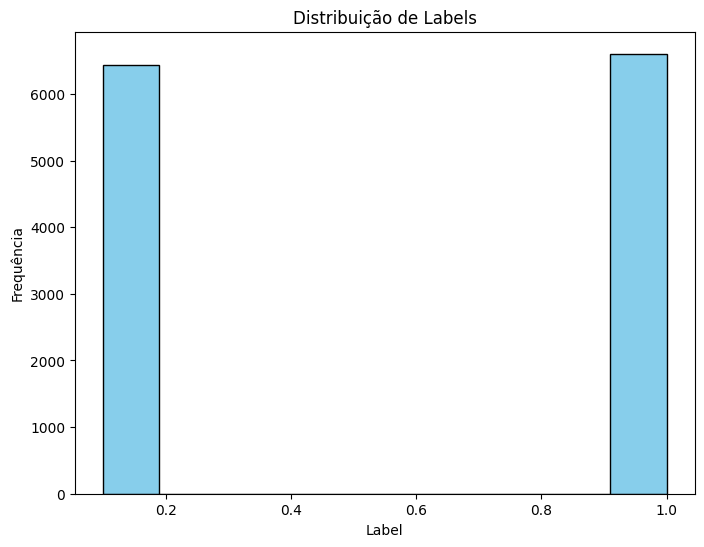

In [44]:
import matplotlib.pyplot as plt

# Histogram para a coluna 'Label'
plt.figure(figsize=(8, 6))
plt.hist(data['Label'], color='skyblue', edgecolor='black')
plt.title('Distribuição de Labels')
plt.xlabel('Label')
plt.ylabel('Frequência')

plt.show()


Distribuição por classe 

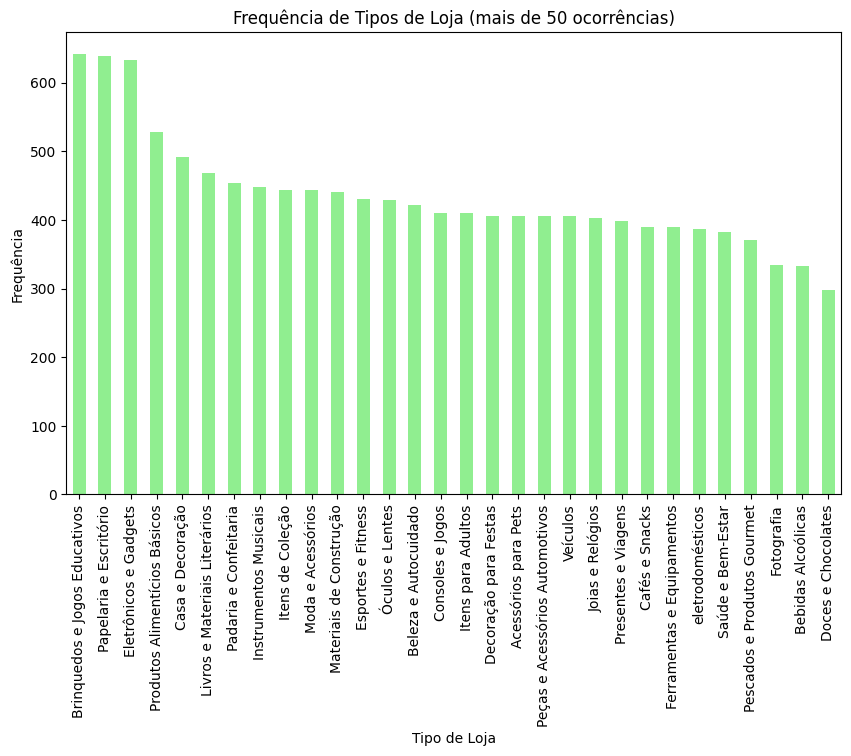

In [45]:

text2_counts = data['Text2'].value_counts()

lojas_mais_que_100 = text2_counts[text2_counts < 1000].index

data_filtered = data.loc[data['Text2'].isin(lojas_mais_que_100)]

plt.figure(figsize=(10, 6))
text2_counts_filtered = data_filtered['Text2'].value_counts()
text2_counts_filtered.plot(kind='bar', color='lightgreen')
plt.title('Frequência de Tipos de Loja (mais de 50 ocorrências)')
plt.xlabel('Tipo de Loja')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.show()


In [46]:
import pandas as pd

label_counts = data.groupby(['Text2', 'Label']).size().unstack(fill_value=0)

label_counts_filtered = label_counts[label_counts.sum(axis=1) < 1000]

label_counts_filtered

Label,0.1,1.0
Text2,,
Acessórios para Pets,197,208
Bebidas Alcoólicas,165,168
Beleza e Autocuidado,231,190
Brinquedos e Jogos Educativos,400,241
Cafés e Snacks,193,197
Casa e Decoração,233,259
Consoles e Jogos,173,237
Decoração para Festas,217,188
Doces e Chocolates,152,146
